<a href="https://colab.research.google.com/github/MaryamMohammedElhanafi/Urban_Air-Quality-and-Health-Impact-dataset/blob/main/full_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Urban Air Quality and Health Impact Dataset.csv')
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [ ]:
df.shape

(1000, 46)

In [ ]:
df.describe()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,569.0,1000.0,1000.000000
mean,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,0.032135,...,12.923695,1.726309e+09,1.726353e+09,0.383811,16.469899,80.195613,3.057743,0.0,9.0,9.729103
std,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,0.083461,...,8.838858,3.753453e+05,3.753012e+05,0.147229,5.552785,6.053805,0.624024,0.0,0.0,0.679728
min,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,-0.021213,...,7.507579,1.725668e+09,1.725686e+09,0.123494,1.676587,65.511677,1.578048,0.0,9.0,8.492431
25%,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,-0.000511,...,9.705341,1.725976e+09,1.726021e+09,0.247940,13.319119,76.287207,2.583375,0.0,9.0,9.195244
50%,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,0.004000,...,10.080919,1.726312e+09,1.726352e+09,0.385185,16.694710,78.562345,3.026242,0.0,9.0,9.546156
75%,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,0.015258,...,10.860683,1.726642e+09,1.726687e+09,0.516248,20.734495,85.318985,3.507127,0.0,9.0,10.242523
max,1.727021e+09,107.797400,91.635546,99.851684,105.060170,89.369854,98.193984,76.648668,92.459293,0.471666,...,61.727919,1.726991e+09,1.727027e+09,0.649488,29.790757,96.684162,5.158112,0.0,9.0,11.485725


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

In [ ]:
df['stations'].value_counts()

,count
stations,
"['KORD', 'KMDW', 'F1983', 'KPWK']",12
"['F8578', 'KLNC', 'KHQZ', 'KDAL', 'KDFW', 'KGKY', 'KRBD', 'KGPM']",11
"['KLGA', 'KJRB', 'F1417', 'KNYC']",9
"['KSKF', 'KSSF', 'KSAT', 'F6098']",7
"['KHOU', 'KIAH', 'KMCJ', 'D0326']",7
"['KSDL', 'KDVT', 'AZM15', 'KPHX']",6
"['KSJC', 'KLVK', 'E6873', 'KHWD', 'KWVI', 'KOAK']",5
"['KHHR', 'KBUR', 'KSMO', 'SE428', 'KLAX', 'F1624', 'CQ070', 'KLGB']",4
"['KNZY', 'KSAN', 'E8360', 'KMYF']",3


In [ ]:
df['icon'].value_counts()

,count
icon,
clear-day,569
partly-cloudy-day,363
rain,55
cloudy,13


In [ ]:
df['City'].value_counts()

,count
City,
Chicago,131
New York City,113
Phoenix,106
Dallas,106
Philadelphia,94
Los Angeles,93
San Diego,93
San Jose,90
Houston,89


In [ ]:
df['source'].value_counts()

,count
source,
fcst,933
comb,67


In [ ]:
df['description'].value_counts()

,count
description,
Clear conditions throughout the day.,554
Partly cloudy throughout the day.,289
Becoming cloudy in the afternoon.,35
Partly cloudy throughout the day with storms possible.,31
Clearing in the afternoon.,21
Partly cloudy throughout the day with a chance of rain.,16
Cloudy skies throughout the day.,13
Partly cloudy throughout the day with a chance of rain throughout the day.,13
Clear conditions throughout the day with storms possible.,11


In [ ]:
df['conditions'].value_counts()

,count
conditions,
Clear,569
Partially cloudy,363
"Rain, Partially cloudy",55
Overcast,13


In [ ]:
df['preciptype'].value_counts()
df['sunrise'].value_counts()

,count
sunrise,
06:35:57,12
06:38:11,12
07:08:01,12
06:23:01,12
07:09:18,11
...,...
07:11:13,2
07:05:22,2
06:16:10,2


In [ ]:
df['preciptype'].value_counts()

,count
preciptype,
['rain'],378


In [ ]:
df['sunset'].value_counts()

,count
sunset,
19:00:52,18
19:43:25,16
18:48:38,14
19:28:36,12
19:02:33,12
...,...
19:20:29,3
18:25:39,2
19:32:40,2


In [ ]:
df['Season'].value_counts()

,count
Season,
Fall,1000


In [ ]:
df['Day_of_Week'].value_counts()

,count
Day_of_Week,
Saturday,205
Monday,139
Wednesday,138
Thursday,132
Friday,131
Tuesday,128
Sunday,127


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df.drop(['icon'], axis=1, inplace=True)

In [ ]:
df.drop(['Condition_Code','preciptype','stations','snowdepth'], axis=1, inplace=True)

In [ ]:
df.shape

(1000, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  snow               1000 non-null   float64
 14  windgust           1000 non-null   float64
 15  windspeed          1000 non-null   float64
 16  winddir            1000 n

In [ ]:
df.isnull().sum()

,0
datetime,0
datetimeEpoch,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0


array([[<Axes: title={'center': 'datetimeEpoch'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslikemax'}>,
        <Axes: title={'center': 'feelslikemin'}>],
       [<Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precip'}>,
        <Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'precipcover'}>],
       [<Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'snowdepth'}>,
        <Axes: title={'center': 'windgust'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>,
        <Axes: title={'center': 'solarradiation'}>,
        <Axes: tit

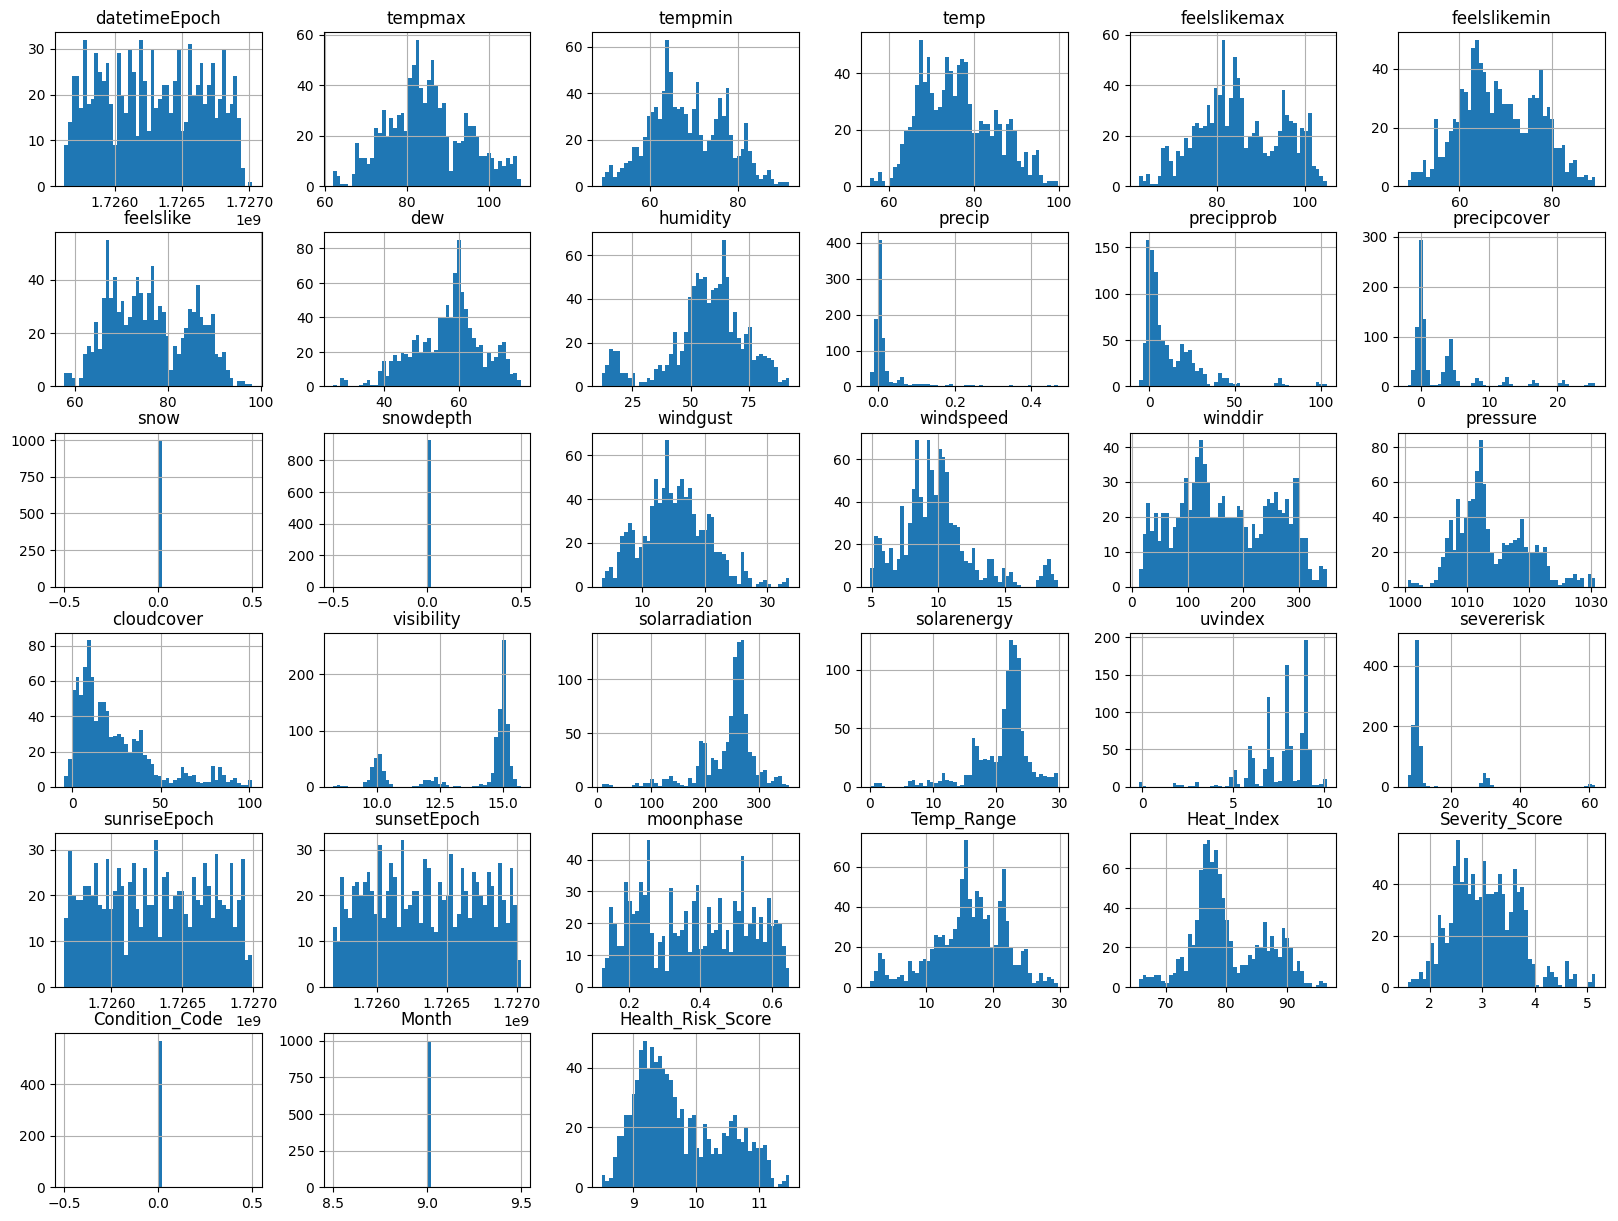

In [ ]:
df.hist(bins=50, figsize=(20,15))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

<Axes: xlabel='Condition_Code', ylabel='Health_Risk_Score'>

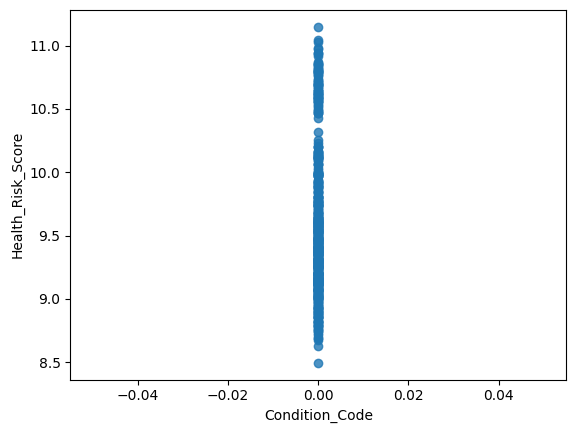

In [ ]:
sns.regplot(data=df, x='Condition_Code', y='Health_Risk_Score')

<Axes: xlabel='snowdepth', ylabel='Health_Risk_Score'>

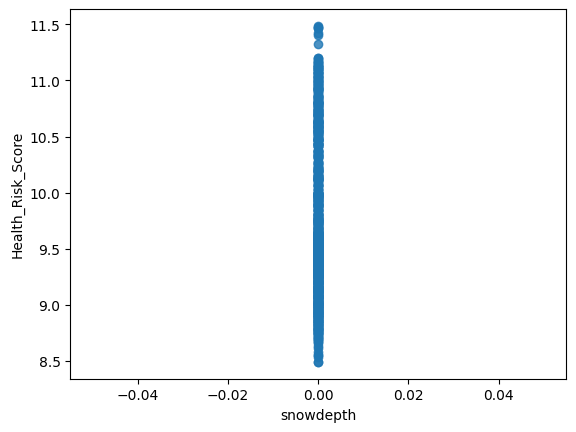

In [ ]:
sns.regplot(data=df, x='snowdepth', y='Health_Risk_Score')

<Axes: xlabel='temp', ylabel='Health_Risk_Score'>

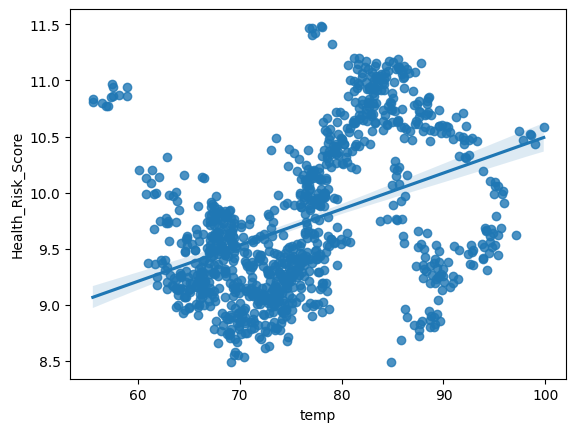

In [ ]:
sns.regplot(data=df, x='temp', y='Health_Risk_Score')

<Axes: xlabel='humidity', ylabel='Health_Risk_Score'>

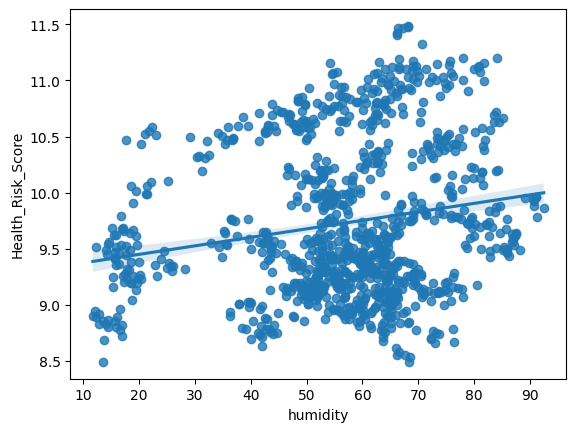

In [ ]:
sns.regplot(data=df, x='humidity', y='Health_Risk_Score')

<Axes: xlabel='precip', ylabel='Health_Risk_Score'>

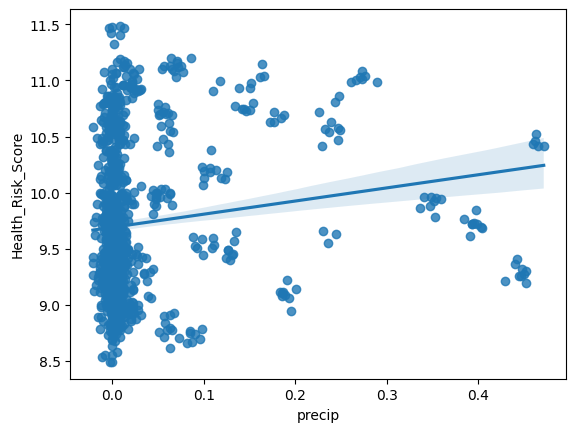

In [ ]:
sns.regplot(data=df, x='precip', y='Health_Risk_Score')

<Axes: xlabel='pressure', ylabel='Health_Risk_Score'>

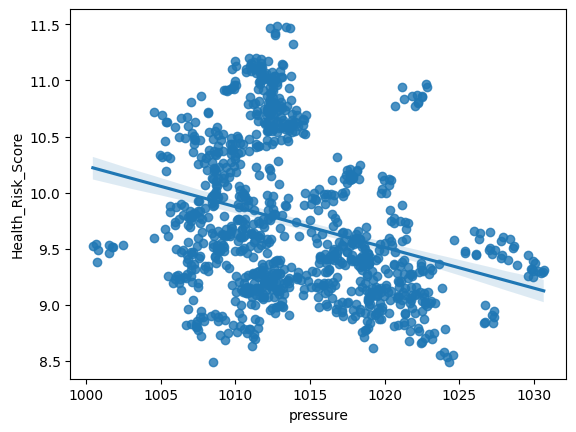

In [ ]:
sns.regplot(data=df, x='pressure', y='Health_Risk_Score')

<Axes: xlabel='conditions', ylabel='Health_Risk_Score'>

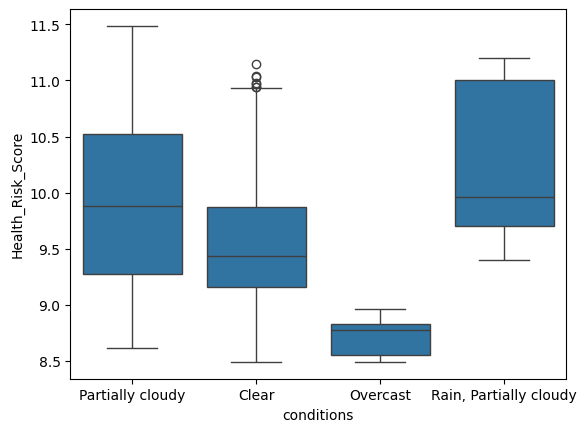

In [ ]:
sns.boxplot(data=df, x='conditions', y='Health_Risk_Score')

<Axes: xlabel='source', ylabel='Health_Risk_Score'>

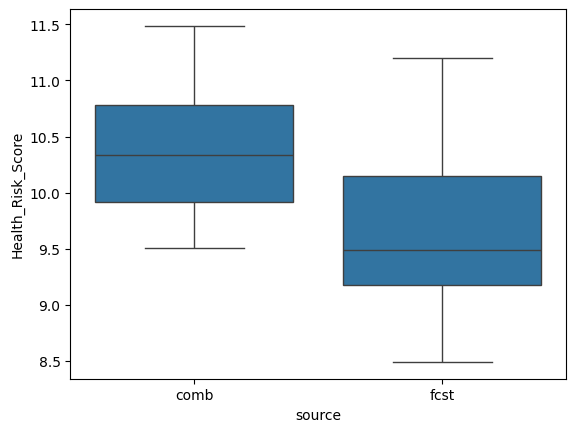

In [ ]:
sns.boxplot(data=df, x='source', y='Health_Risk_Score')

<Axes: xlabel='Day_of_Week', ylabel='Health_Risk_Score'>

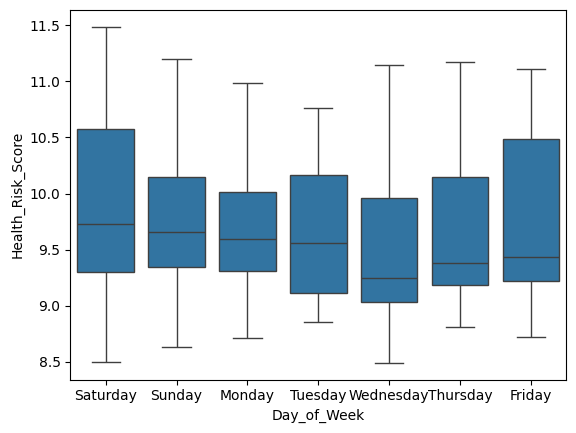

In [ ]:
sns.boxplot(data=df, x='Day_of_Week', y='Health_Risk_Score')

In [ ]:
df['Month'].value_counts()

,count
Month,
9.0,1000


In [ ]:
df.drop(['Season'], axis=1, inplace=True)

In [ ]:
df.drop(['Month'], axis=1, inplace=True)

In [ ]:
df.drop(['datetimeEpoch'], axis=1, inplace=True)

In [ ]:
y = df['Health_Risk_Score'].copy()
x = df.drop('Health_Risk_Score', axis=1)


In [ ]:
x.isnull().sum()

,0
datetime,0
datetimeEpoch,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
cat_encoder = OneHotEncoder(sparse_output=False)
column_cat = x.select_dtypes(include=['object']).columns.tolist()
#df_encode_1h = cat_encoder.fit_transform(df[column_encode])
column_num = x.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [ ]:
print(column_num)

['datetimeEpoch', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunriseEpoch', 'sunsetEpoch', 'moonphase', 'Temp_Range', 'Heat_Index', 'Severity_Score', 'Condition_Code', 'Month', 'Is_Weekend']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipline = Pipeline([('imputer', imputer),('std_scaler', StandardScaler()),])
cat_pipline = Pipeline([('encoding', OneHotEncoder())])
full_pipline = ColumnTransformer([("num", num_pipline, column_num), ("cat", cat_pipline, column_cat),])



In [ ]:
column_num

['datetimeEpoch',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'snow',
 'windgust',
 'windspeed',
 'winddir',
 'pressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'severerisk',
 'sunriseEpoch',
 'sunsetEpoch',
 'moonphase',
 'Temp_Range',
 'Heat_Index',
 'Severity_Score',
 'Is_Weekend',
 'Health_Risk_Score']

In [ ]:
import sklearn
sklearn.__version__

'1.3.2'

In [ ]:
full_pipline.set_output(transform="default")
#df_prepared =pd.DataFrame(full_pipline.fit_transform(x).toarray())
df_prepared =full_pipline.fit_transform(x)

In [ ]:
type(df_prepared)

scipy.sparse._csr.csr_matrix

In [ ]:
df_prepared

<1000x394 sparse matrix of type '<class 'numpy.float64'>'
	with 41502 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(df_prepared, y)

LinearRegression()

In [ ]:
prediction = LR.predict(df_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, prediction)
rmse = np.sqrt(mse)
print(rmse)

0.05743482989949384
